# Logistic Regression Project

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

We'll be trying to predict a classification- survival or deceased.

We'll use a "semi-cleaned" version of the titanic data set.

  
    
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv("titanic_train.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis

Now that we have our training data loaded let's do some Data Analysis and try to understand the data.

#### Make a heatmap to visualize which features have `null` values and how many!

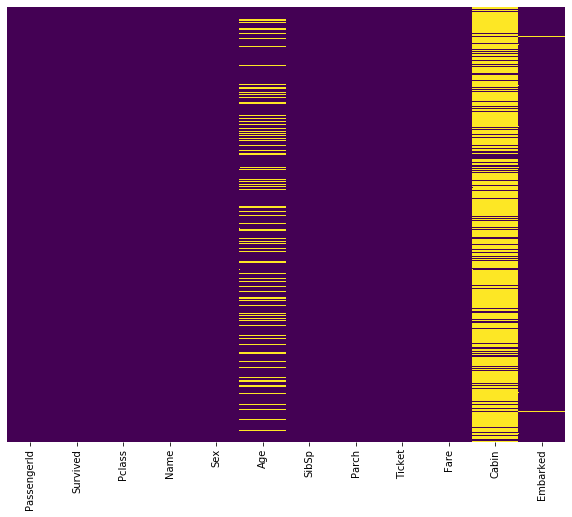

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data_train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

From the above heatmap we can infer that the columns `Age`, `Cabin` and `Embarked` have null values.  
Now, the Null values in the `Cabin` column are way too much for substitution so in general it is better to drop such a feature.  
On the other hand the columns `Age` and `Embarked` do have null values but they are less and can be dealt by replacement/ Substitution.

### Now, Let's explore relationship between some of the features.

In [8]:
#### A countplot for survivors

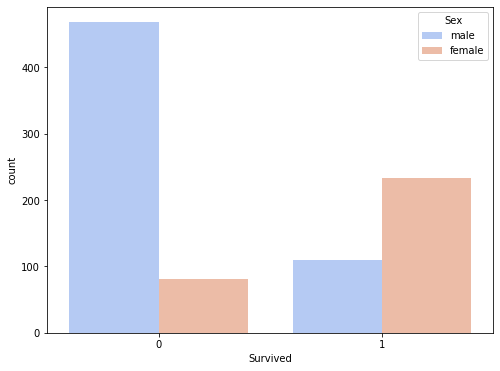

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x=data_train['Survived'], hue=data_train['Sex'], palette = 'coolwarm')

From the above plot we can infer that there were a lot more males who didn't survive then there were females.
Approximately female survivors are twice as much as male survivors. This makes sense as females and children have higher priority for evacuation.

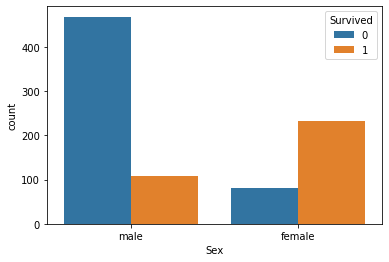

In [10]:
sns.countplot(x=data_train['Sex'],hue=data_train['Survived'])

The above visualization solidifies our earlier inference. The above plot clearly shows that only about 15% of the total male passengers survived while around 85% of the female passengers survived.

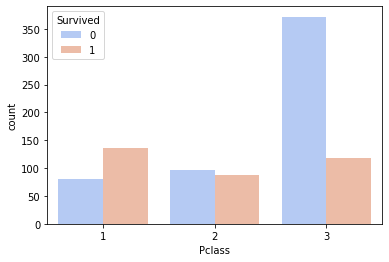

In [11]:
sns.countplot(x=data_train['Pclass'],hue=data_train['Survived'],palette='coolwarm')

From the above plot we can infer that people in Class 3 suffered most casualities.

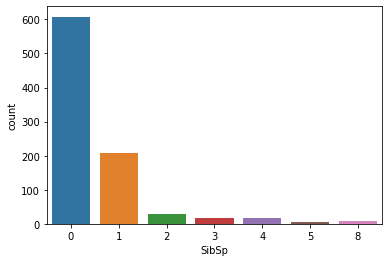

In [12]:
sns.countplot(x='SibSp',data=data_train)

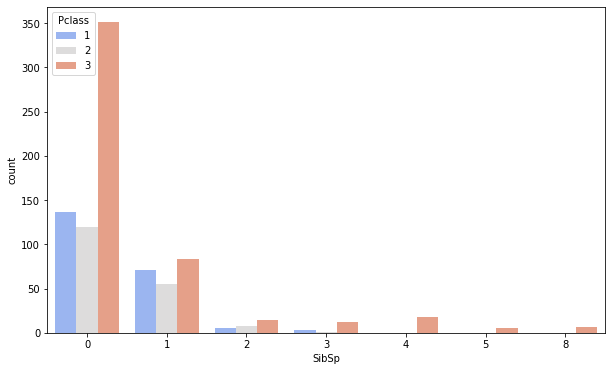

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=data_train['SibSp'],hue=data_train['Pclass'],palette='coolwarm')

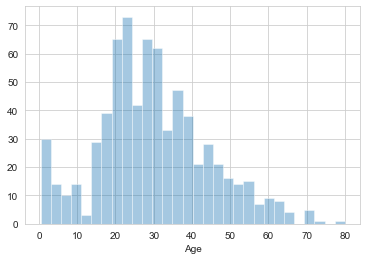

In [14]:
sns.set_style('whitegrid')
sns.distplot(data_train['Age'].dropna(),bins=30, kde=False )

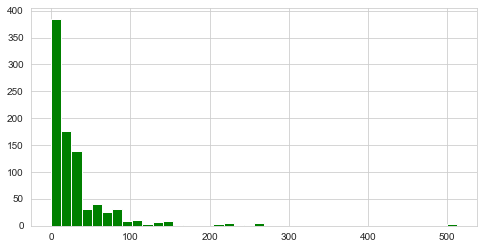

In [15]:
data_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#### Data Visualization using cufflinks

In [17]:
import cufflinks as cf

In [18]:
cf.go_offline()

In [19]:
data_train['Fare'].iplot(kind='hist')

And there can endlessly more such analysis...

## Data Cleaning  
  
### Missing Data  
  
We want to fill in missing age data instead of just dropping the missing age data rows.  
1) One way to do this is by filling in the mean age of all the passengers (imputation).  
2) We can also be a little smarter about this and check the average age by passenger class and fill accordingly.  
3) We can create a model that predicts the age based on all the other features and use that to fill the missing values.  

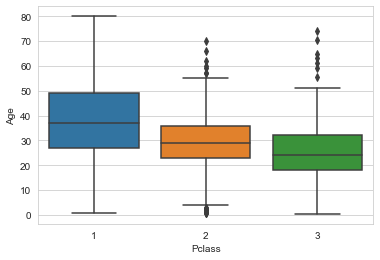

In [20]:
sns.boxplot(x=data_train['Pclass'],y=data_train['Age'])

In [28]:
data_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [30]:
# To get the Average age values in each `Pclass` for filling in the null values
data_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [44]:
def fillna_Age(cols):
    Pclass = cols[0]
    Age = cols[1]
    if(pd.isna(Age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 30
        else:
            return 25
    else:
        return Age

In [107]:
train_proc=data_train.copy()

In [108]:
train_proc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
train_proc['Age'] = train_proc[['Pclass','Age']].apply(fillna_Age, axis = 1)

In [110]:
train_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


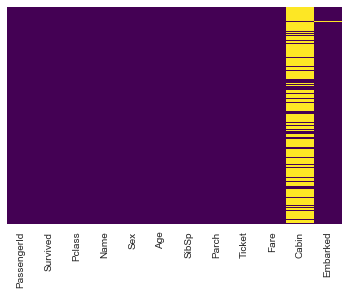

In [111]:
sns.heatmap(data = train_proc.isnull(),yticklabels=False, cbar = False, cmap='viridis')

Above we see that there are no null values in Age column any more.

Now, let us deal with the remaining `missing data`.  
  
1) Since `cabin` column has a lot of missing data it would be better to drop it.  
2) Once we have dropped `cabin`, the only null values remaining will be the 2 in `Embarked` column. Since there are very less null values in this column we can drop these values.

In [112]:
train_proc.drop('Cabin', axis =1, inplace=True)

In [113]:
train_proc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


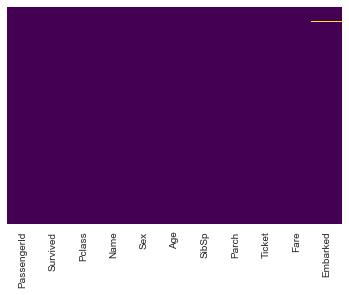

In [114]:
sns.heatmap(data = train_proc.isnull(),yticklabels=False, cbar = False, cmap='viridis')

In [115]:
# Now we will drop all the remaining null values

In [116]:
train_proc.dropna(inplace=True)

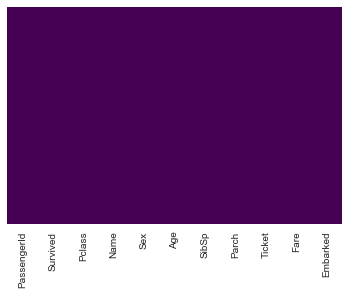

In [117]:
sns.heatmap(data = train_proc.isnull(),yticklabels=False, cbar = False, cmap='viridis')

In [118]:
np.sum(train_proc.isna())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Categorical data to Numerical  
  
Now that we have removed all the null values, next step is to convert all the categorical data to a computer understandable, numerical form.  
There are many ways to do this here we use the `get_dummies` function.  
  
We then remove the first column after applying this function on the categorical columns to remove redundancy since one of the columns after applying the `get_dummies` functions can always be found from the remaining columns.

In [119]:
sex = pd.get_dummies(data=train_proc['Sex'],drop_first=True)

In [120]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [121]:
embark = pd.get_dummies(train_proc['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [122]:
train_proc['Sex[M=1]'] = pd.get_dummies(data=train_proc['Sex'],drop_first=True)

In [123]:
train_proc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex[M=1]
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [124]:
train_proc = pd.concat([train_proc,embark],axis=1)

In [125]:
train_proc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex[M=1],Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Now that we have stored all the information from `Sex` and `Embarked` columns to new columns we can remove the older ones.

In [126]:
train_proc.drop(['Sex','Embarked'], axis=1,inplace=True)

In [127]:
train_proc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex[M=1],Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


Now we have all our categorical data in computer understandable numerical form.

### Drop Useless Columns
  
In the data we have many columns that donot provide any useful information for making predictions such as `Name`, `PassengerId`, etc. These columns can be removed without any adverse effect on predictions.

In [128]:
train_proc.drop(['PassengerId','Name','Ticket'], axis = 1, inplace=True)

In [129]:
train_proc.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex[M=1],Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Finally, We are done with cleanig our data!!!

## Building a Logistic Regression Model

Now that we are done we have our data ready, we can finally begin making our model.

### Splitting the data
  
First, we need to split data into training and target variables.  
Then, we will make training and test sets.

In [133]:
X = train_proc.drop('Survived', axis = 1)
y = train_proc['Survived']

In [134]:
X.head(), y.head()

(   Pclass   Age  SibSp  Parch     Fare  Sex[M=1]  Q  S
 0       3  22.0      1      0   7.2500         1  0  1
 1       1  38.0      1      0  71.2833         0  0  0
 2       3  26.0      0      0   7.9250         0  0  1
 3       1  35.0      1      0  53.1000         0  0  1
 4       3  35.0      0      0   8.0500         1  0  1, 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [138]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 8), (622,), (267, 8), (267,))

### Training the model

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
LogReg = LogisticRegression()

In [152]:
LogReg.fit(X_train,y_train)

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
# Model 2 with the above recommended adjustments

LogReg_2 = LogisticRegression(solver = 'lbfgs', max_iter=200)

In [178]:
LogReg_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction and Evaluation

In [154]:
y_preds = LogReg.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [169]:
# Way 1 to print
print("The Accuracy for the above model is:{:.2f}".format(accuracy_score(y_test,y_preds)*100))

The Accuracy for the above model is:80.90


In [170]:
# Way 2 to print
print(f"The Accuracy for the above model is:{accuracy_score(y_test,y_preds)*100:.2f}")

The Accuracy for the above model is:80.90


In [172]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [173]:
print(confusion_matrix(y_test,y_preds))

[[148  15]
 [ 36  68]]


In [179]:
# Predictions using Model 2
y_preds_2 = LogReg_2.predict(X_test)

In [181]:
# Accuracy using Model 2
print("The Accuracy for the above model is:{:.2f}".format(accuracy_score(y_test,y_preds_2)*100))

The Accuracy for the above model is:83.52


As observed above trying different hyperparameters will help to obtain better results...